Shape of dataset: (43847, 7)

Columns in dataset: ['demand-forecast', 'temperature-normal', 'temperature-forecast', 'solar-forecast', 'day-ahead-auction-price', 'wind-forecast', 'day-ahead-auction-time']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43847 entries, 2020-01-01 01:00:00+01:00 to 2024-12-31 23:00:00+01:00
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   demand-forecast          43847 non-null  float64
 1   temperature-normal       43847 non-null  float64
 2   temperature-forecast     43847 non-null  float64
 3   solar-forecast           43847 non-null  float64
 4   day-ahead-auction-price  43847 non-null  float64
 5   wind-forecast            43847 non-null  float64
 6   day-ahead-auction-time   43847 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.7+ MB

First 5 rows:


,demand-forecast,temperature-normal,temperature-forecast,solar-forecast,day-ahead-auction-price,wind-forecast,day-ahead-auction-time
contract-delivery,,,,,,,
2020-01-01 01:00:00+01:00,43471.50,1.32,0.60,0.00,38.60,7019.50,2019-12-31 11:00:00+00:00
2020-01-01 02:00:00+01:00,42555.50,1.29,0.30,0.00,36.55,7407.00,2019-12-31 11:00:00+00:00
2020-01-01 03:00:00+01:00,42448.25,1.22,-0.10,0.00,32.32,7540.50,2019-12-31 11:00:00+00:00
2020-01-01 04:00:00+01:00,42567.75,1.17,-0.40,0.00,30.85,7802.75,2019-12-31 11:00:00+00:00
2020-01-01 05:00:00+01:00,42209.00,1.10,-0.70,0.00,30.14,7805.75,2019-12-31 11:00:00+00:00



Summary statistics:


,demand-forecast,temperature-normal,temperature-forecast,solar-forecast,day-ahead-auction-price,wind-forecast
count,43847.00,43847.00,43847.00,43847.00,43847.00,43847.00
mean,54168.83,10.03,11.17,6110.83,107.45,14793.63
std,9232.67,6.72,7.43,9450.02,105.71,10952.12
min,30544.75,-0.12,-11.20,0.00,-500.00,46.50
25%,46634.62,3.53,5.40,1.50,41.35,5880.00
50%,54049.25,9.71,10.60,188.25,81.74,11889.75
75%,61762.12,15.60,16.80,9680.12,129.70,21702.50
max,77585.75,23.70,34.50,48572.50,2325.83,52399.00



Missing values per column:
demand-forecast            0
temperature-normal         0
temperature-forecast       0
solar-forecast             0
day-ahead-auction-price    0
wind-forecast              0
day-ahead-auction-time     0
dtype: int64

Correlation matrix (rounded):
                         day-ahead-auction-price  demand-forecast  \
day-ahead-auction-price                     1.00             0.19   
demand-forecast                             0.19             1.00   
wind-forecast                              -0.29             0.11   
solar-forecast                             -0.11             0.30   
temperature-forecast                        0.01            -0.10   
temperature-normal                          0.06            -0.12   

                         wind-forecast  solar-forecast  temperature-forecast  \
day-ahead-auction-price          -0.29           -0.11                  0.01   
demand-forecast                   0.11            0.30                 -0.10   
w

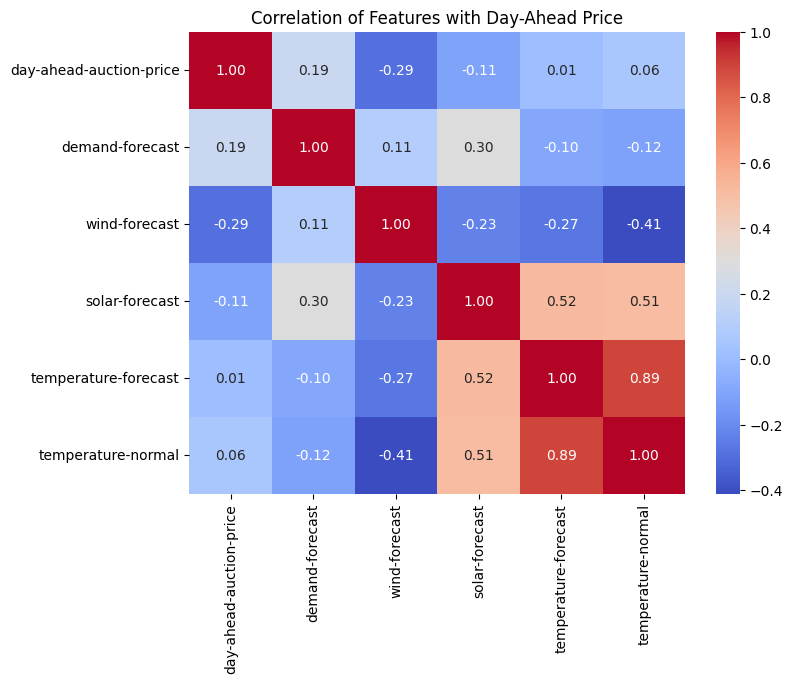

In [116]:
# ================================
# Step 3: Load and Inspect Dataset
# ================================

# --- Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Display settings for better readability ---
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# --- Load Dataset ---
file_path = "/Users/spoorthysiddannaiah/Downloads/terra_one_coding/ml-engineer-dataset.csv"
df = pd.read_csv(file_path)

# --- Convert timestamp to local time (CET/Berlin) and set as index ---
# Why? So that hourly and daily patterns reflect local time

df['contract-delivery'] = pd.to_datetime(df['contract-delivery'], utc=True).dt.tz_convert('Europe/Berlin')
df = df.set_index('contract-delivery')

# --- Quick Overview ---
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())

print("\nDataset info:")
df.info()

print("\nFirst 5 rows:")
display(df.head())

# --- Summary Statistics ---
print("\nSummary statistics:")
display(df.describe())

# --- Check for Missing Values ---
print("\nMissing values per column:")
print(df.isna().sum())

# -- Visualize correlations among key features ---
cols = ['day-ahead-auction-price', 'demand-forecast', 
        'wind-forecast', 'solar-forecast', 'temperature-forecast', 'temperature-normal']

corr = df[cols].corr()
print("\nCorrelation matrix (rounded):")
print(corr.round(2))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Features with Day-Ahead Price")
plt.show()


In [117]:
# --- Step 1: Import Libraries ---
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Train: MAE=31.15, MSE=2992.48, R2=0.813
Validation: MAE=27.21, MSE=1624.00, R2=0.283
Test: MAE=29.95, MSE=4525.20, R2=-0.088

Predicted, True, and Error Table (First 2 Weeks of Test):
                           day-ahead-auction-price  naive_pred  error
contract-delivery                                                    
2024-01-01 00:00:00+01:00                     0.10       36.54 -36.44
2024-01-01 01:00:00+01:00                     0.01       13.27 -13.26
2024-01-01 02:00:00+01:00                     0.00        4.00  -4.00
2024-01-01 03:00:00+01:00                    -0.01        0.31  -0.32
2024-01-01 04:00:00+01:00                    -0.03        0.58  -0.61
2024-01-01 05:00:00+01:00                    -0.02        1.28  -1.30
2024-01-01 06:00:00+01:00                    -0.05        0.36  -0.41
2024-01-01 07:00:00+01:00                    -0.02       -0.03   0.01
2024-01-01 08:00:00+01:00                     0.00        2.98  -2.98
2024-01-01 09:00:00+01:00                     

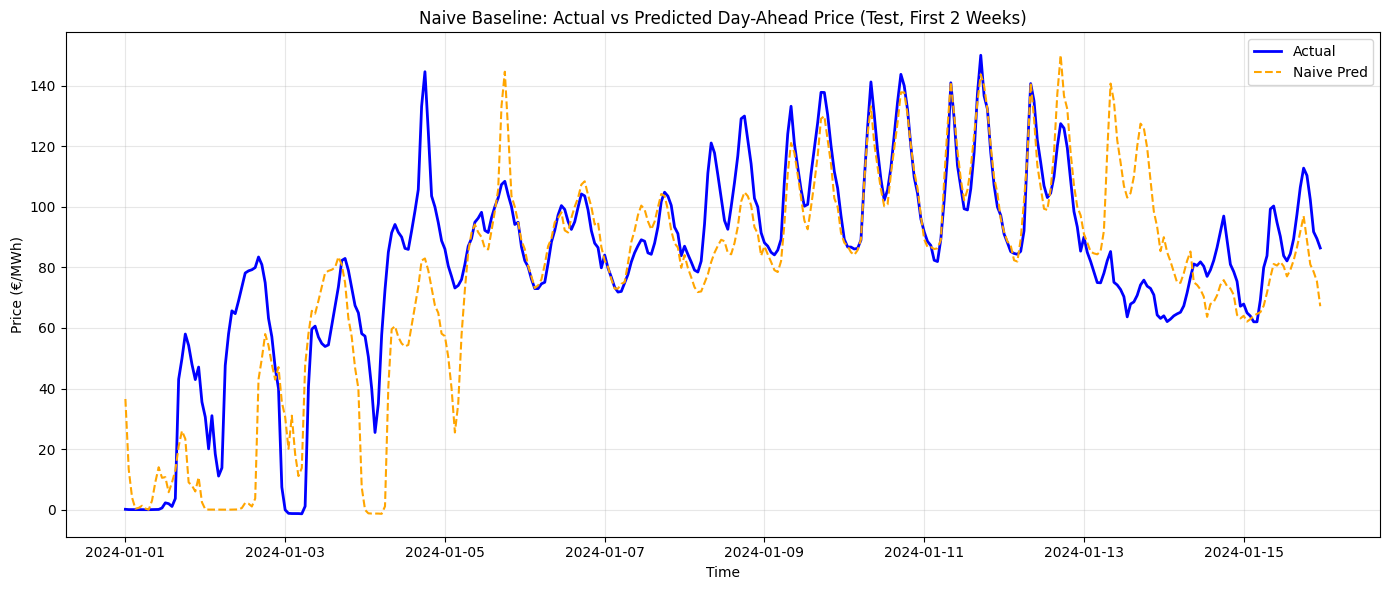

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def naive_baseline_subset_features(df, target='day-ahead-auction-price', features=None, plot_days=15, print_rows=20):
    """
    Implements a naive baseline model that predicts the day-ahead price using a 24-hour shift.
    Evaluates performance on train, validation, and test sets, and visualizes results for the
    first two weeks of the test set.        
    """
    
    if features is not None:
        df = df.dropna(subset=features + [target]).copy()
    else:
        df = df.copy()

    # Naive 24h-shift baseline
    df['naive_pred'] = df[target].shift(24)
    df_valid = df.dropna(subset=[target, 'naive_pred']).copy()

    # Splits
    train = df_valid[df_valid.index.year < 2023]
    val = df_valid[df_valid.index.year == 2023]
    test = df_valid[df_valid.index.year == 2024]

    for split, name in zip([train, val, test], ['Train', 'Validation', 'Test']):
        y_true = split[target]
        y_pred = split['naive_pred']
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"{name}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.3f}")

    # Table and plot for first 2 weeks of test set
    plot_len = plot_days * 24
    plot_df = test.iloc[:plot_len]
    plot_df_results = plot_df[[target, 'naive_pred']].copy()
    plot_df_results['error'] = plot_df_results[target] - plot_df_results['naive_pred']

    print("\nPredicted, True, and Error Table (First 2 Weeks of Test):")
    print(plot_df_results.head(print_rows))

    plt.figure(figsize=(14,6))
    plt.plot(plot_df.index, plot_df[target], label='Actual', color='blue', lw=2)
    plt.plot(plot_df.index, plot_df['naive_pred'], label='Naive Pred', color='orange', linestyle='--')
    plt.legend()
    plt.title("Naive Baseline: Actual vs Predicted Day-Ahead Price (Test, First 2 Weeks)")
    plt.ylabel("Price (€/MWh)")
    plt.xlabel("Time")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


my_features = ['demand-forecast', 'solar-forecast', 'wind-forecast']  
naive_baseline_subset_features(df, features=my_features)


Most naive predictions are reasonable during stable periods, but large errors occur precisely during sudden changes, showing a need for features and models that react to new external signals.


- Add hour-of-day, day-of-week, and holiday flags (naive shows hour bias).
- Include recent lags (24h, 48h) and rolling means to capture inertia.
- Add interactions/conditioning on wind/solar/demand forecasts (residuals correlate).
- Handling for spikes (separate spike detector or quantile loss).

## TASK 3


In [119]:
import pandas as pd
import numpy as np
import holidays
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import ParameterSampler
from math import sqrt
import matplotlib.pyplot as plt


# Feature Engineering Function
def create_features_full(df, country='DE'):
    df = df.copy()
    df['hour'] = df.index.hour
    df['weekday'] = df.index.weekday
    df['month'] = df.index.month
    df['is_weekend'] = (df['weekday'] >= 5).astype(int)
    years = df.index.year.unique()
    hol_days = set()
    for y in years:
        hol_days.update([d for d in holidays.country_holidays(country, years=[y])])
    df['is_holiday'] = df.index.normalize().isin(pd.to_datetime(list(hol_days))).astype(int)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    lags = [24, 48, 72, 168]
    for lag in lags:
        df[f'price_lag{lag}'] = df['day-ahead-auction-price'].shift(lag)
        df[f'demand_lag{lag}'] = df['demand-forecast'].shift(lag)
        df[f'solar_lag{lag}'] = df['solar-forecast'].shift(lag)
        df[f'wind_lag{lag}'] = df['wind-forecast'].shift(lag)
    df['net_load'] = df['demand-forecast'] - (df['wind-forecast'] + df['solar-forecast'])
    df['net_load_lag24'] = df['net_load'].shift(24)
    df['net_load_rollmean168'] = df['net_load'].shift(1).rolling(window=168).mean()
    df['price_rollmean168'] = df['day-ahead-auction-price'].shift(1).rolling(window=168).mean()
    df['demand_hour_interaction'] = df['demand-forecast'] * df['hour_sin']
    df['solar_weekend'] = df['solar-forecast'] * df['is_weekend']
    return df



    


In [120]:
# 1. Feature importance display function
def show_feature_importance(df):
    df_feat = create_features_full(df)
    feature_cols = [c for c in df_feat.columns if c != 'day-ahead-auction-price' and np.issubdtype(df_feat[c].dtype, np.number)]
    df_feat = df_feat.dropna(subset=feature_cols + ['day-ahead-auction-price'])
    X = df_feat[feature_cols]
    y = df_feat['day-ahead-auction-price']
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    importances = rf.feature_importances_
    importance_df = pd.DataFrame({'feature': feature_cols, 'importance': importances}).sort_values('importance', ascending=False)
    print("Top 20 features by importance:")
    print(importance_df.head(20))
    return importance_df
    

In [121]:
# 2. Basic Random Forest train and eval
def train_eval_rf_simple(df, plot_sample=True):
    df_feat = create_features_full(df)
    features = [c for c in df_feat.columns if c != 'day-ahead-auction-price' and np.issubdtype(df_feat[c].dtype, np.number)]
    df_feat = df_feat.dropna(subset=features + ['day-ahead-auction-price'])
    train = df_feat[df_feat.index.year < 2023]
    val = df_feat[df_feat.index.year == 2023]
    test = df_feat[df_feat.index.year == 2024]
    X_train, y_train = train[features], train['day-ahead-auction-price']
    X_val, y_val = val[features], val['day-ahead-auction-price']
    X_test, y_test = test[features], test['day-ahead-auction-price']
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    for name, y, y_hat in zip(['Train', 'Val', 'Test'], [y_train, y_val, y_test], [model.predict(X_train), model.predict(X_val), model.predict(X_test)]):
        print(f"{name}: MAE={mean_absolute_error(y, y_hat):.2f}, MSE={mean_squared_error(y, y_hat):.2f}, R2={r2_score(y, y_hat):.3f}")
    if plot_sample:
        idx = test.index[:336]
        plt.figure(figsize=(12, 5))
        plt.plot(idx, y_test[:336], label='Actual', color='black', lw=2)
        plt.plot(idx, model.predict(X_test)[:336], label='Predicted', color='royalblue', linestyle='--')
        plt.legend()
        plt.title("Random Forest: Actual vs Predicted Day-Ahead Price (Test, First 2 Weeks)")
        plt.ylabel("Price (€/MWh)")
        plt.show()




In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import ParameterSampler
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

def train_eval_rf_forward_chaining_full(df, selected_features=None, plot_sample=True):
    df_feat = create_features_full(df)
    all_features = [c for c in df_feat.columns if c != 'day-ahead-auction-price' and np.issubdtype(df_feat[c].dtype, np.number)]
    
    # Use selected features if provided, else all numeric features
    if selected_features is not None:
        # Remove features with zero importance if selected_features includes importance info
        selected_features = [f for f in selected_features if f in all_features]
        features = selected_features
    else:
        features = all_features
    
    df_feat = df_feat.dropna(subset=features + ['day-ahead-auction-price'])
    X_all = df_feat[features]
    y_all = df_feat['day-ahead-auction-price']
    years = sorted(df_feat.index.year.unique())

    param_dist = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 0.5]
    }
    param_list = list(ParameterSampler(param_dist, n_iter=8, random_state=42))
    best_params = None
    best_score = float('inf')
    print("Forward Chaining CV (no leakage):")
    for params in param_list:
        fold_maes = []
        for i in range(1, len(years)):
            train_years = years[:i]
            val_year = years[i]
            train_idx = df_feat.index.year.isin(train_years)
            val_idx = df_feat.index.year == val_year
            X_train, y_train = X_all[train_idx], y_all[train_idx]
            X_val, y_val = X_all[val_idx], y_all[val_idx]
            model = RandomForestRegressor(random_state=42, n_jobs=-1, **params)
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_val_pred)
            fold_maes.append(mae)
        avg_mae = np.mean(fold_maes)
        if avg_mae < best_score:
            best_score = avg_mae
            best_params = params
    print(f"Best Params: {best_params}")
    print(f"CV Avg MAE: {best_score:.2f}\n")

    train_val_idx = df_feat.index.year < 2024
    X_train_val, y_train_val = X_all[train_val_idx], y_all[train_val_idx]
    model_final = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params)
    model_final.fit(X_train_val, y_train_val)

    test_idx = df_feat.index.year == 2024
    X_test, y_test = X_all[test_idx], y_all[test_idx]
    y_test_pred = model_final.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"Test set evaluation (2024): MAE={mae_test:.2f}, MSE={mse_test:.2f}, RMSE={rmse_test:.2f}, R2={r2_test:.3f}")

    if plot_sample:
        plt.figure(figsize=(12, 5))
        plt.plot(X_test.index[:336], y_test[:336], label='Actual', color='black', lw=2)
        plt.plot(X_test.index[:336], y_test_pred[:336], label='Predicted', color='royalblue', linestyle='--')
        plt.legend()
        plt.title("Final Model: Actual vs Predicted Day-Ahead Price (Test, First 2 Weeks)")
        plt.ylabel("Price (€/MWh)")
        plt.show()


Train: MAE=3.41, MSE=41.10, R2=0.997
Val: MAE=28.10, MSE=1302.45, R2=0.425
Test: MAE=22.97, MSE=2503.69, R2=0.398


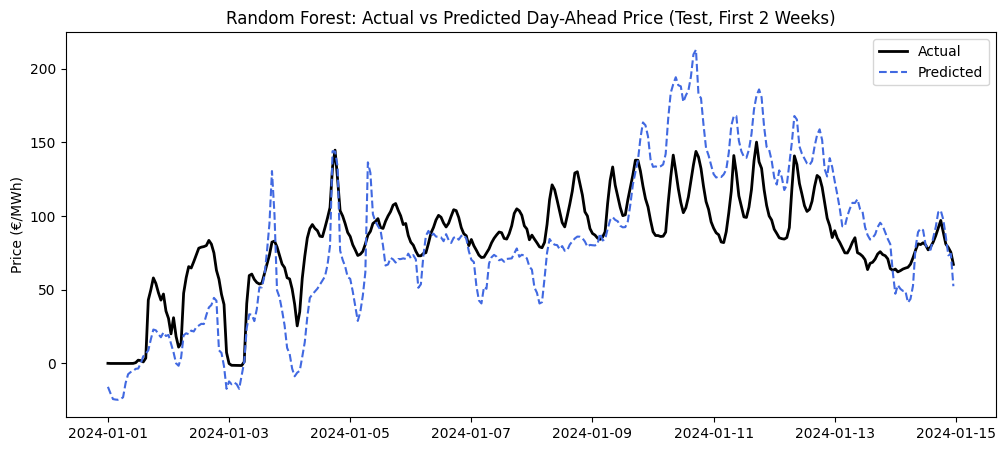

In [123]:
train_eval_rf_simple(df)


Forward Chaining CV (no leakage):
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 10}
CV Avg MAE: 40.10

Test set evaluation (2024): MAE=16.95, MSE=2103.63, RMSE=45.87, R2=0.494


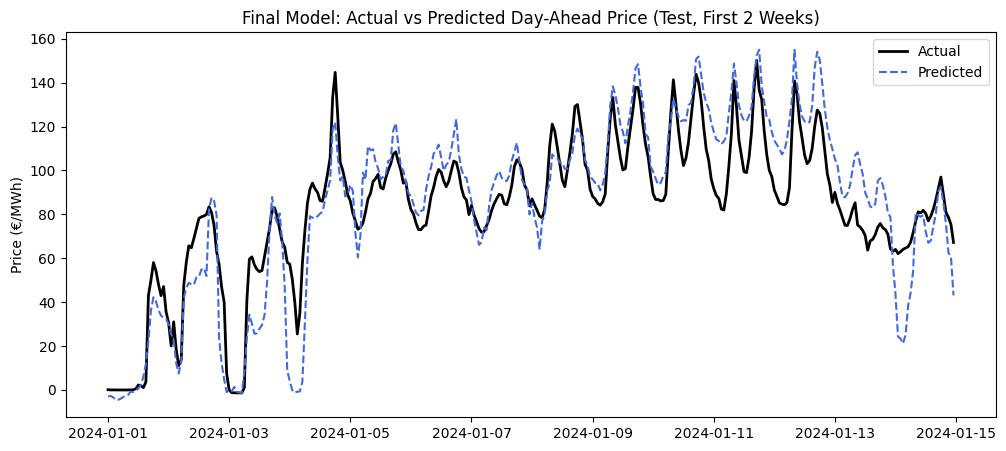

In [124]:
train_eval_rf_forward_chaining_full(df)

In [125]:
show_feature_importance(df)


Top 20 features by importance:
                 feature  importance
16           price_lag24        0.74
32              net_load        0.08
35     price_rollmean168        0.04
28          price_lag168        0.04
4          wind-forecast        0.02
24           price_lag72        0.01
33        net_load_lag24        0.01
20           price_lag48        0.01
34  net_load_rollmean168        0.01
2   temperature-forecast        0.00
19            wind_lag24        0.00
6                weekday        0.00
15             month_cos        0.00
25          demand_lag72        0.00
31           wind_lag168        0.00
27            wind_lag72        0.00
1     temperature-normal        0.00
23            wind_lag48        0.00
21          demand_lag48        0.00
37         solar_weekend        0.00


,feature,importance
16,price_lag24,0.74
32,net_load,0.08
35,price_rollmean168,0.04
28,price_lag168,0.04
4,wind-forecast,0.02
24,price_lag72,0.01
33,net_load_lag24,0.01
20,price_lag48,0.01
34,net_load_rollmean168,0.01
2,temperature-forecast,0.00


Forward Chaining CV (no leakage):
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
CV Avg MAE: 36.66

Test set evaluation (2024): MAE=16.79, MSE=2074.54, RMSE=45.55, R2=0.501


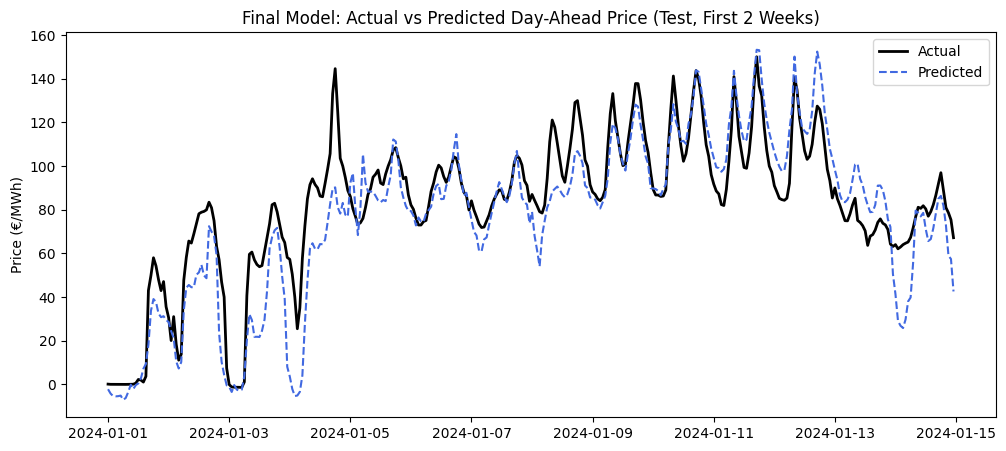

In [ ]:
top_features = [
    'price_lag24', 'net_load', 'price_rollmean168', 'price_lag168',
    'wind-forecast', 'price_lag72', 'net_load_lag24',
    'price_lag48', 'net_load_rollmean168'
]

train_eval_rf_forward_chaining_full(df, selected_features=top_features)


In [139]:
df.columns

Index(['demand-forecast', 'temperature-normal', 'temperature-forecast',
       'solar-forecast', 'day-ahead-auction-price', 'wind-forecast',
       'day-ahead-auction-time'],
      dtype='object')

## LSTM Training

In [140]:
df_feat = create_features_full(df)  

In [163]:
# Sequence creation function
def create_sequences_day_ahead(df, past_features, forecast_features, target_col, look_back=168, horizon=24):
    X, y, dates = [], [], []
    
    for i in range(look_back, len(df)-horizon+1, 24):  # step by 24h
        # Past block
        past_block = df[past_features].iloc[i-look_back:i].values
        past_forecast_pad = np.zeros((look_back, len(forecast_features)))
        past_block_full = np.hstack([past_block, past_forecast_pad])
        
        # Forecast block (next horizon)
        forecast_block = df[forecast_features].iloc[i:i+horizon].values
        last_past = df[past_features].iloc[i-1].values
        past_pad_block = np.tile(last_past, (horizon,1))
        forecast_block_full = np.hstack([past_pad_block, forecast_block])
        
        # Combine past + forecast
        X_block = np.vstack([past_block_full, forecast_block_full])
        y_block = df[target_col].iloc[i:i+horizon].values
        
        X.append(X_block)
        y.append(y_block)
        dates.append(df.index[i:i+horizon])
    
    return np.array(X), np.array(y), dates



In [166]:
import numpy as np
import pandas as pd

# Assume df_feat is feature-engineered and index is datetime
df_feat = create_features_full(df)
df_feat = df_feat.sort_index()  # Make sure it's sorted by time
df_feat = df_feat.dropna()


# Split by year
train_df = df_feat[df_feat.index.year < 2023]
val_df = df_feat[df_feat.index.year == 2023]
test_df = df_feat[df_feat.index.year == 2024]

print("Train:", train_df.index[0], train_df.index[-1])
print("Val:", val_df.index[0], val_df.index[-1])
print("Test:", test_df.index[0], test_df.index[-1])

# Create sequences for each set
past_features = top_features
forecast_features = []
target_col = 'day-ahead-auction-price'
look_back = 168
horizon = 24

X_train, y_train, train_dates = create_sequences_day_ahead(train_df, past_features, forecast_features, target_col, look_back, horizon)
X_val, y_val, val_dates = create_sequences_day_ahead(val_df, past_features, forecast_features, target_col, look_back, horizon)
X_test, y_test, test_dates = create_sequences_day_ahead(test_df, past_features, forecast_features, target_col, look_back, horizon)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Continue as in previous workflow:
# - flatten, scale with MinMaxScaler, train LSTM, evaluate, plot, print metrics...


Train: 2020-01-08 01:00:00+01:00 2022-12-31 23:00:00+01:00
Val: 2023-01-01 00:00:00+01:00 2023-12-31 23:00:00+01:00
Test: 2024-01-01 00:00:00+01:00 2024-12-31 23:00:00+01:00
X_train: (1081, 192, 9)
y_train: (1081, 24)
X_val: (358, 192, 9)
y_val: (358, 24)
X_test: (359, 192, 9)
y_test: (359, 24)


In [169]:
# --- Scale features ---
n_train, n_timesteps, n_features = X_train.shape
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, n_features)).reshape(X_train.shape)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, n_features)).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, n_features)).reshape(X_test.shape)


In [170]:
# --- LSTM Model ---
model = Sequential([
    LSTM(128, input_shape=(n_timesteps, n_features), return_sequences=True),
    LSTM(64),
    Dense(y_train.shape[1])
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

history = model.fit(
    X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
    epochs=50, batch_size=32, verbose=1
)


/Users/spoorthysiddannaiah/Downloads/terra_one_coding/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 192, 128)       │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,624 (475.09 KB)

 Trainable params: 121,624 (475.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 30003.9160 - mae: 118.0248 - val_loss: 10636.8418 - val_mae: 92.8903
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 32596.7656 - mae: 122.7683 - val_loss: 10185.2598 - val_mae: 90.6870
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 26536.4512 - mae: 110.0440 - val_loss: 9773.5684 - val_mae: 88.6536
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 29609.0059 - mae: 116.4034 - val_loss: 9382.4268 - val_mae: 86.7025
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 25479.7930 - mae: 106.8129 - val_loss: 9016.2832 - val_mae: 84.8549
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 27173.0938 - mae: 107.5976 - val_loss: 8669.5303 - val_mae: 83.0750
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 24945.9570 - mae: 105.4205 - val_loss: 8333.8076 - val_mae: 81.3258
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 25337.5605 - mae: 105.2412 - val_loss: 800

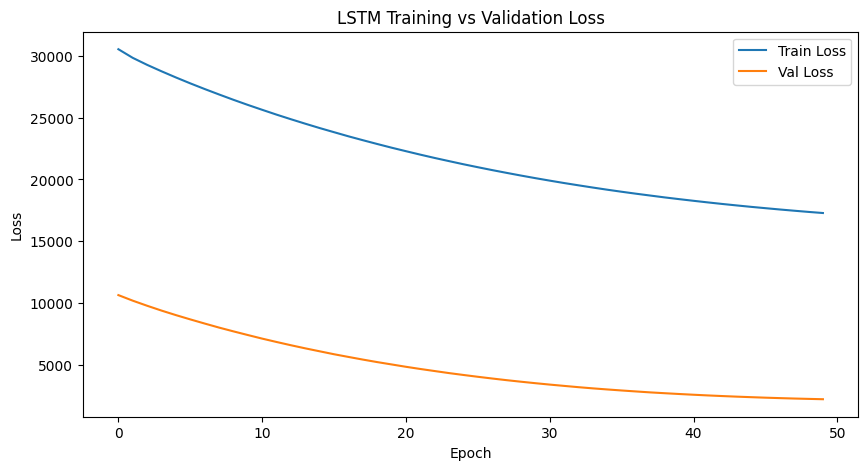

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
TEST MAE: 34.442, RMSE: 63.975, R2: 0.029


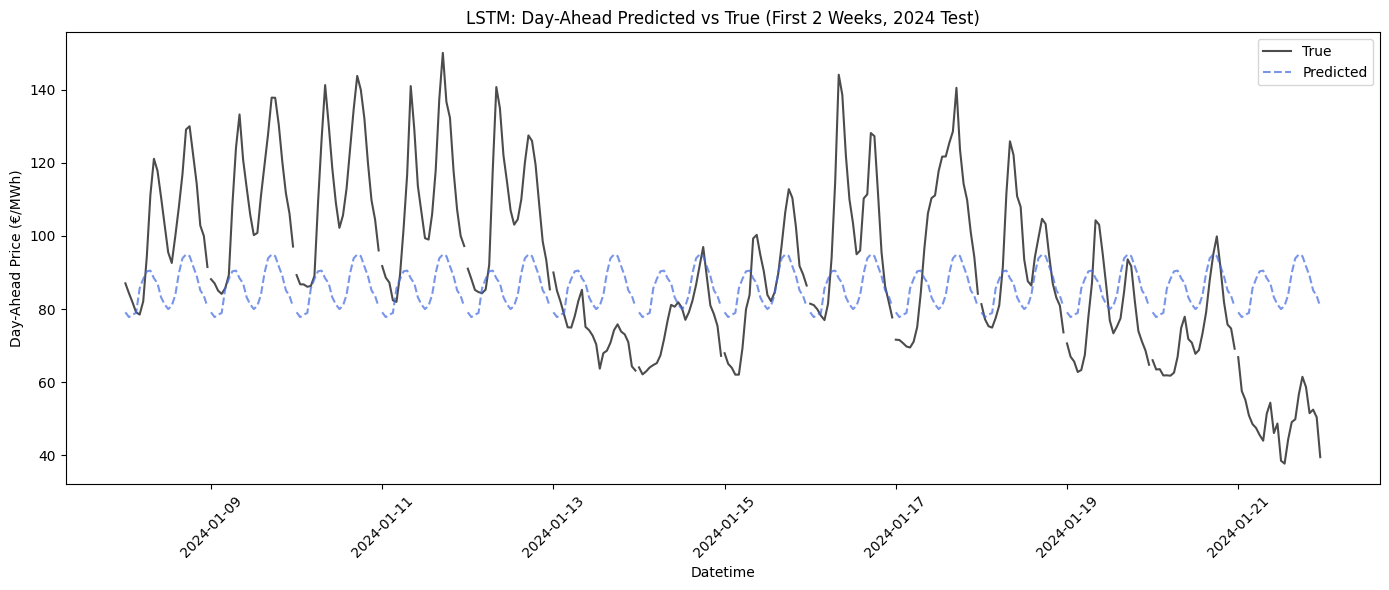


Predicted vs True with Error for first 2 days:
                    Datetime  Predicted   True  Error
0  2024-01-08 00:00:00+01:00      79.10  87.02   7.92
1  2024-01-08 01:00:00+01:00      77.78  84.32   6.54
2  2024-01-08 02:00:00+01:00      78.44  81.82   3.38
3  2024-01-08 03:00:00+01:00      78.93  79.11   0.18
4  2024-01-08 04:00:00+01:00      85.66  78.48  -7.18
5  2024-01-08 05:00:00+01:00      88.24  82.10  -6.14
6  2024-01-08 06:00:00+01:00      90.32  94.30   3.98
7  2024-01-08 07:00:00+01:00      90.51 111.10  20.59
8  2024-01-08 08:00:00+01:00      88.42 121.11  32.69
9  2024-01-08 09:00:00+01:00      87.03 117.83  30.80
10 2024-01-08 10:00:00+01:00      83.20 110.60  27.40
11 2024-01-08 11:00:00+01:00      81.26 103.00  21.74
12 2024-01-08 12:00:00+01:00      79.98  95.50  15.52
13 2024-01-08 13:00:00+01:00      80.90  92.60  11.70
14 2024-01-08 14:00:00+01:00      83.87 100.00  16.13
15 2024-01-08 15:00:00+01:00      89.84 107.98  18.14
16 2024-01-08 16:00:00+01:00      

In [172]:
#  --- Plot training/validation loss ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Predict and evaluate ---
y_pred = model.predict(X_test_scaled)
y_pred_flat = y_pred.reshape(-1)
y_test_flat = y_test.reshape(-1)

mae = mean_absolute_error(y_test_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
r2 = r2_score(y_test_flat, y_pred_flat)
print(f"TEST MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

# --- Day-wise plot for first 2 weeks ---
days_to_plot = min(14, len(test_dates))
plt.figure(figsize=(14, 6))
for i in range(days_to_plot):
    plt.plot(test_dates[i], y_test[i], color='black', alpha=0.7, label='True' if i==0 else "")
    plt.plot(test_dates[i], y_pred[i], color='royalblue', linestyle='--', alpha=0.7, label='Predicted' if i==0 else "")
plt.legend()
plt.title("LSTM: Day-Ahead Predicted vs True (First 2 Weeks, 2024 Test)")
plt.xlabel('Datetime')
plt.ylabel('Day-Ahead Price (€/MWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Table: first 48 hours predicted vs true ---
flat_dates = pd.to_datetime(np.concatenate(test_dates))
results_df = pd.DataFrame({
    'Datetime': flat_dates[:48],
    'Predicted': y_pred_flat[:48],
    'True': y_test_flat[:48]
})
results_df['Error'] = results_df['True'] - results_df['Predicted']
print("\nPredicted vs True with Error for first 2 days:")
print(results_df)

In [174]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping




# Drop initial rows with NaNs due to lagging
df_feat = df_feat.dropna()

# -------------------------------
# 3. Train / Val / Test split
# -------------------------------
train = df_feat[df_feat.index.year < 2023]
val = df_feat[df_feat.index.year == 2023]
test = df_feat[df_feat.index.year == 2024]

# -------------------------------
# 4. Feature selection
# -------------------------------
feature_cols = [
    'price_lag24', 'net_load', 'price_rollmean168', 'price_lag168',
    'wind-forecast', 'price_lag72', 'net_load_lag24',
    'price_lag48', 'net_load_rollmean168'
]
target_col = 'day-ahead-auction-price'

# -------------------------------
# 5. Sequence creation
# -------------------------------
look_back = 24*7
horizon = 24

def create_sequences(data, feature_cols, target_col=target_col, look_back=look_back, horizon=horizon):
    X, y = [], []
    for i in range(look_back, len(data) - horizon + 1):
        X.append(data[feature_cols].iloc[i-look_back:i].values)
        y.append(data[target_col].iloc[i:i+horizon].values)
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, feature_cols)
X_val, y_val = create_sequences(val, feature_cols)
X_test, y_test = create_sequences(test, feature_cols)

# -------------------------------
# 6. Scaling
# -------------------------------
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

nsamples, ntimesteps, nfeatures = X_train.shape
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, nfeatures)).reshape(nsamples, ntimesteps, nfeatures)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, nfeatures)).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, nfeatures)).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# -------------------------------
# 7. Build LSTM
# -------------------------------
model = Sequential([
    LSTM(64, input_shape=(look_back, len(feature_cols)), return_sequences=False),
    Dense(horizon)
])
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50, batch_size=64, callbacks=[early_stop], verbose=1
)

# -------------------------------
# 8. Evaluate
# -------------------------------
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

# -------------------------------
# 9. Plot first 2 weeks of test
# -------------------------------
plt.figure(figsize=(15,5))
# first 2 weeks = 14*24=336 points
plt.plot(test.index[look_back:look_back+336], y_test.flatten()[:336], label='True')
plt.plot(test.index[look_back:look_back+336], y_pred.flatten()[:336], label='Pred')
plt.title("LSTM Predictions vs True Prices (First 2 Weeks)")
plt.xlabel("Time")
plt.ylabel("Day-ahead price")
plt.legend()
plt.show()


: 